In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(layer_dims):
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
    parameters = {}
    L = len(layer_dims)            # number of layers in the network
    for l in range(1, L):
        parameters['W' + str(l)] = tf.get_variable('W' + str(l) , [layer_dims[l], layer_dims[l-1]],  initializer = tf.contrib.layers.xavier_initializer(seed = 1))  #*0.01
        parameters['b' + str(l)] = tf.get_variable('b' + str(l),[layer_dims[l], 1],  initializer = tf.zeros_initializer())
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    ### START CODE HERE ### (approx. 6 lines of code)
#     W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
#     W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
#     W3 = tf.get_variable("W3", [6, 12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###
    
    return parameters

In [3]:
network_layer=[784,16,16,10]
parameters = initialize_parameters(network_layer)

In [6]:
from tensorflow.python.framework import ops
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.

init = tf.global_variables_initializer()
with tf.Session() as sess:
  # Restore variables from disk.
           # Run the initialization
    sess.run(init)
    
    saver.restore(sess, "./saved_model/model.ckpt")
    print("Model restored.")
    print(type(parameters['W1']))
    print(parameters['W1'].eval())
    print(parameters['b1'].eval())

INFO:tensorflow:Restoring parameters from ./saved_model/model.ckpt
Model restored.
<class 'tensorflow.python.ops.variables.Variable'>
[[-0.07698201 -0.08336387 -0.07433794 ... -0.03583223  0.00852627
   0.02142677]
 [ 0.06581955  0.0486571   0.02417413 ...  0.08421017  0.05880846
  -0.07478838]
 [-0.03511408  0.07325806 -0.00935223 ...  0.04019384  0.06981052
  -0.04618645]
 ...
 [-0.04202675 -0.00866584  0.07966198 ... -0.03028224 -0.08036571
  -0.00710306]
 [-0.00700899  0.03899312 -0.0460798  ...  0.07146367  0.0320491
   0.00994988]
 [ 0.05764115 -0.05095618  0.03379001 ...  0.05744845  0.02907361
  -0.04694676]]
[[ 0.2601934 ]
 [ 0.4287062 ]
 [-0.19821462]
 [ 0.05104057]
 [ 0.05537603]
 [ 0.14086115]
 [-0.03804755]
 [ 0.00983803]
 [-0.05846215]
 [-0.46574205]
 [-0.20054515]
 [-0.06525063]
 [ 0.08595277]
 [ 0.26052377]
 [ 0.17321904]
 [-0.2825526 ]]


In [11]:

def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    init = tf.global_variables_initializer()
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3 }
    
    x = tf.placeholder("float", [X.shape[0], 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    sess.run(init)
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3
    

In [12]:
import os
import struct

def load_mnist_data(path='MNIST_data/'):
    """Load MNIST data from `path`"""
    Train_labels_path = os.path.join(path,'%s-labels.idx1-ubyte'% 'train')
    Train_images_path = os.path.join(path,'%s-images.idx3-ubyte'% 'train')
    Test_labels_path = os.path.join(path,'%s-labels.idx1-ubyte'% 't10k')
    Test_images_path = os.path.join(path,'%s-images.idx3-ubyte'% 't10k')
    #open(images_path)
    print(Train_labels_path)
    print(type(Train_labels_path))
    with open(Train_labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        Y_train_orig = np.fromfile(lbpath,dtype=np.uint8)
    with open(Test_labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        Y_test_orig = np.fromfile(lbpath,dtype=np.uint8)

    with open(Train_images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        X_train_orig = np.fromfile(imgpath,dtype=np.uint8).reshape(len(Y_train_orig), 784)
    with open(Test_images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        X_test_orig = np.fromfile(imgpath,dtype=np.uint8).reshape(len(Y_test_orig), 784)

    return X_train_orig, Y_train_orig, X_test_orig, Y_test_orig


In [13]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_mnist_data(path='MNIST_data/')
print(X_train_orig.shape)
print(Y_train_orig.shape)
############
X_train = X_train_orig.T/255
Y_train_tensor = tf.one_hot(Y_train_orig, depth=10, axis=0)

X_test = X_test_orig.T/255
Y_test_tensor = tf.one_hot(Y_test_orig, depth=10, axis=0)
#方法1
with tf.Session() as sess: 
    # Run session and call the output "result"
    Y_train =  sess.run(Y_train_tensor)
    Y_test = sess.run(Y_test_tensor)
#方法2
Y_train2 = np.eye(10)[Y_train_orig.reshape(-1)].T
print(X_train.shape)
print(Y_train.shape)
print(Y_train2.shape)
print(Y_train2)
print(X_test.shape)
print(Y_test.shape)
print(type(Y_test_tensor))
print(type(Y_test))
print(type(X_test))

print(parameters['W1'].shape)
print(X_test.T[1].shape)

MNIST_data/train-labels.idx1-ubyte
<class 'str'>
(60000, 784)
(60000,)
(784, 60000)
(10, 60000)
(10, 60000)
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
(784, 10000)
(10, 10000)
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(16, 784)
(784,)


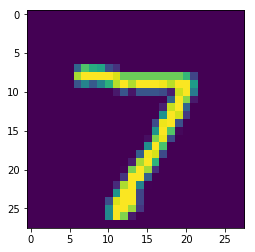

Your algorithm predicts: Yhat = 5
real class is Y = 7


In [16]:
import scipy
from PIL import Image
from scipy import ndimage

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "thumbs_up.jpg"
## END CODE HERE ##

# We preprocess your image to fit your algorithm.
#fname = "images/" + my_image
#image = np.array(ndimage.imread(fname, flatten=False))
#my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
#my_image_prediction = predict(my_image, parameters)
index2=0
my_image_prediction = predict(X_test.T[index2].reshape(784, 1), parameters)


#plt.imshow(image)
plt.imshow(X_test.T[index2].reshape(28,28))
plt.show()
print("Your algorithm predicts: Yhat = " + str(np.squeeze(my_image_prediction)))
print("real class is Y = "+ str(Y_test_orig[index2]))

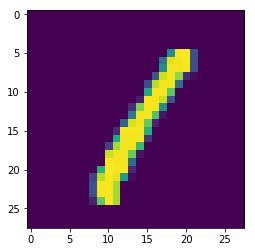

Your algorithm predicts: Yhat = 8
real class is Y = 1


In [15]:
index2=3
my_image_prediction = predict(X_test.T[index2].reshape(784, 1), parameters)


#plt.imshow(image)
plt.imshow(X_train.T[index2].reshape(28,28))
plt.show()
print("Your algorithm predicts: Yhat = " + str(np.squeeze(my_image_prediction)))
print("real class is Y = "+ str(Y_train_orig[index2]))